### Code

In [1]:
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.ops import rnn, rnn_cell
#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import numpy as np # Included
import pandas as pd
import csv
import sys
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer as DV
from keras.losses import binary_crossentropy

#np.set_printoptions(threshold=sys.maxsize)

dir1="/home/ubuntu/dataset/"
#dir1="/Users/ejl334/Downloads/IoT Dataset by UC/Concatenated/Archive/"

from numpy import genfromtxt
benign_traffic = genfromtxt(dir1+'benign_traffic.csv', delimiter=',')
malicious_traffic_dataset = genfromtxt(dir1+'gafgyt_combo.csv', delimiter=',')

/home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
# DELETE COLUMNS WITH NAN
print("========================================================================")
print("***BENIGN TRAFFIC***")
print("========================================================================")
print("***DIMENSIONS***")
numrows = len(benign_traffic)
numcols = len(benign_traffic[0])
print("Dimensions Rows: %s Columns: %s" %(numrows,numcols))

print("***NAN ROWS***")
nan_rows=np.argwhere(np.isnan(benign_traffic).any(axis=1))
print(nan_rows)

print("***** NAN Removal *****")
benign_traffic = benign_traffic[~np.isnan(benign_traffic).any(axis=1)]

print("***DIMENSIONS***")
numrows_good = len(benign_traffic)
numcols = len(benign_traffic[0])
print("Dimensions Rows: %s Columns: %s" %(numrows_good,numcols))

print("***NAN ROWS***")
nan_rows=np.argwhere(np.isnan(benign_traffic).any(axis=1))
print(nan_rows)

print("========================================================================")
print("***MALICIOUS TRAFFIC***")
print("========================================================================")
print("***DIMENSIONS ML***")
malicious_dataset = malicious_traffic_dataset

numrows_ml = len(malicious_dataset)
numcols_ml = len(malicious_dataset[0])
print("Dimensions ML Rows: %s Columns: %s" %(numrows_ml,numcols_ml))

print("***NAN ROWS ML***")
nan_rows_ml=np.argwhere(np.isnan(malicious_dataset).any(axis=1))
print(nan_rows_ml)

print("***** NAN Removal ML *****")
malicious_dataset = malicious_dataset[~np.isnan(malicious_dataset).any(axis=1)]

print("***DIMENSIONS ML***")
numrows_bad = len(malicious_dataset)
numcols_bad = len(malicious_dataset[0])
print("Dimensions ML Rows: %s Columns: %s" %(numrows_bad,numcols_bad))
print("***NAN ROWS ML***")
nan_rows_ml=np.argwhere(np.isnan(malicious_dataset).any(axis=1))
print(nan_rows_ml)

***BENIGN TRAFFIC***
***DIMENSIONS***
Dimensions Rows: 555941 Columns: 115
***NAN ROWS***
[[     0]
 [ 49549]
 [ 62663]
 [101764]
 [277005]
 [339160]
 [437675]
 [489826]
 [536412]]
***** NAN Removal *****
***DIMENSIONS***
Dimensions Rows: 555932 Columns: 115
***NAN ROWS***
[]
***MALICIOUS TRAFFIC***
***DIMENSIONS ML***
Dimensions ML Rows: 515165 Columns: 115
***NAN ROWS ML***
[[     0]
 [ 59719]
 [112732]
 [165747]
 [223900]
 [285281]
 [342812]
 [401482]
 [455766]]
***** NAN Removal ML *****
***DIMENSIONS ML***
Dimensions ML Rows: 515156 Columns: 115
***NAN ROWS ML***
[]


In [3]:
benign_traffic[0]

array([1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 1.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 1.00000000e+00, 6.00000000e+01,
       0.00000000e+00, 1.00000000e+00, 6.00000000e+01, 0.00000000e+00,
       1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 1.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 1.00000000e+00, 6.00000000e+01,
       0.00000000e+00, 1.00000000e+00, 6.00000000e+01, 0.00000000e+00,
       1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 1.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 1.00000000e+00, 6.00000000e+01,
       0.00000000e+00, 6.00000000e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 6.00000000e+01, 0.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 6.00000000e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 6.00000000e+01, 0.00000000e+00,
      

In [4]:
# DELETE UNWANTED COLUMNS
benign_traffic = np.delete(benign_traffic, [2,5,8,11,14,17,20,23,26,29,\
                                            34,35,41,42,48,49,55,56,62,63,\
                                            66,67,69,70,72,73,75,76,78,79,\
                                            84,85,91,92,98,99,105,106,112,113,], axis=1)
malicious_dataset = np.delete(malicious_dataset, [2,5,8,11,14,17,20,23,26,29,\
                                            34,35,41,42,48,49,55,56,62,63,\
                                            66,67,69,70,72,73,75,76,78,79,\
                                            84,85,91,92,98,99,105,106,112,113,], axis=1)


In [5]:
print("***DIMENSIONS BENIGN***")
numrows_good = len(benign_traffic)
numcols_good = len(benign_traffic[0])
print("Dimensions Rows: %s Columns: %s" %(numrows_good,numcols_good))
print("***DIMENSIONS MALICIOUS***")
numrows_bad = len(malicious_dataset)
numcols_bad = len(malicious_dataset[0])
print("Dimensions Rows: %s Columns: %s" %(numrows_bad,numcols_bad))

***DIMENSIONS BENIGN***
Dimensions Rows: 555932 Columns: 75
***DIMENSIONS MALICIOUS***
Dimensions Rows: 515156 Columns: 75


In [6]:
# Define Labels
y_benings = np.zeros(len(benign_traffic),dtype=int)
y_malicious = np.ones(len(malicious_dataset),dtype=int)

complete_dataset = np.concatenate((benign_traffic, malicious_dataset), 0)
print("*** COMPLETE DATASET ***")
numrows = len(complete_dataset)
numcols = len(complete_dataset[0])
print("Dimensions Rows: %s Columns: %s" %(numrows,numcols))
complete_dataset_labels = np.concatenate((y_benings,y_malicious),0)
print("*** COMPLETE DATASET Labels ***")
numrows = len(complete_dataset_labels)
numcols = len(complete_dataset_labels)
print("Dimensions Rows: %s" %(numrows))

*** COMPLETE DATASET ***
Dimensions Rows: 1071088 Columns: 75
*** COMPLETE DATASET Labels ***
Dimensions Rows: 1071088


In [7]:
# NORMALIZE DATASET
scaler = MinMaxScaler(feature_range=(0, 1))
dataX_ = scaler.fit_transform(complete_dataset)

In [8]:
from sklearn import model_selection
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(dataX_, complete_dataset_labels, test_size=validation_size, random_state=seed)

##### NEW #####
#validation_size = 0.50
#seed = 7
#X_validation, X_test, Y_validation, Y_test = model_selection.train_test_split(X_validation, Y_validation, test_size=validation_size, random_state=seed)
###############

del dataX_

In [9]:
print(np.shape(X_train), np.shape(X_validation))#, np.shape(X_test))
print(len(Y_train), len(Y_validation))#, len(Y_test))

(856870, 75) (214218, 75)
856870 214218


In [10]:
# Vectorize data
print(len(Y_validation))
vector_train_x = X_train.reshape((len(X_train), 1, 75))
print(vector_train_x.shape)
vector_validation_x = X_validation.reshape((len(X_validation), 1, 75))
print(vector_validation_x.shape)
#vector_test_x = X_test.reshape((len(X_test), 1, 75))
#print(vector_test_x.shape)

214218
(856870, 1, 75)
(214218, 1, 75)


In [11]:
# Vectorize Data

# vector_train_x = X_.reshape((len(X_), 1, 75))
# print(vector_train_x.shape)

# LSTM MODEL

In [ ]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection

seed=7
np.random.seed(seed)
cvscores = []
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
#print(vector_train_x.shape)
for index, (train, validation) in enumerate(kfold.split(vector_train_x, Y_train)):
    
    
    print("===================================================")
    print("Length of Train: %s   Length of Validation %s" %(len(train),len(validation)))
    print("\n\nTraining on fold " + str(index+1) + "/10...\n\n")
    
    batch_size = 100000
    model = Sequential()
    model.add(LSTM(28, input_shape=(1,75), return_sequences=True, name="LSTM_0"))
    model.add(Dropout(0.5, name="Dropout_0"))
    model.add(LSTM(28, name="LSTM_1"))
    model.add(Dropout(0.5, name="Dropout_1"))
    model.add(Dense(28, name="Dense_0"))
    model.add(Dense(1, activation="sigmoid", name="Dense_1")) #activation="tanh"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
#    model.summary()
#    model.fit(vector_train_x[train], complete_dataset_labels[train], epochs=20, batch_size=batch_size, verbose=2, shuffle=True,callbacks=[early_stopping],validation_data=(vector_validation_x, Y_validation)) #
    history = model.fit(vector_train_x[train], Y_train[train], epochs=30, batch_size=batch_size, verbose=2, shuffle=True,validation_data=(vector_train_x[validation], Y_train[validation]),callbacks=[early_stopping]) #
    scores = model.evaluate(vector_train_x[validation], Y_train[validation], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
from keras.models import load_model
model.save(dir1+'gafgyt_combo_model.h5')

Length of Train: 685496   Length of Validation 171374


Training on fold 1/10...


Train on 685496 samples, validate on 171374 samples
Epoch 1/30
 - 6s - loss: 0.6972 - acc: 0.4885 - val_loss: 0.6898 - val_acc: 0.5191
Epoch 2/30
 - 1s - loss: 0.6846 - acc: 0.5555 - val_loss: 0.6765 - val_acc: 0.5191
Epoch 3/30
 - 1s - loss: 0.6691 - acc: 0.6523 - val_loss: 0.6560 - val_acc: 0.8758
Epoch 4/30
 - 2s - loss: 0.6438 - acc: 0.8268 - val_loss: 0.6211 - val_acc: 0.9897
Epoch 5/30
 - 2s - loss: 0.6015 - acc: 0.9380 - val_loss: 0.5631 - val_acc: 0.9963
Epoch 6/30
 - 2s - loss: 0.5337 - acc: 0.9771 - val_loss: 0.4736 - val_acc: 0.9978
Epoch 7/30
 - 2s - loss: 0.4373 - acc: 0.9904 - val_loss: 0.3549 - val_acc: 0.9982
Epoch 8/30
 - 1s - loss: 0.3214 - acc: 0.9955 - val_loss: 0.2313 - val_acc: 0.9984
Epoch 9/30
 - 2s - loss: 0.2118 - acc: 0.9973 - val_loss: 0.1360 - val_acc: 0.9984
Epoch 10/30
 - 1s - loss: 0.1306 - acc: 0.9978 - val_loss: 0.0785 - val_acc: 0.9983
Epoch 11/30
 - 1s - loss: 0.0803 -

In [ ]:
model.summary()

In [15]:
print(cvscores)

[99.91772380874579, 99.93464586226615, 90.19396174448866, 99.93931401496144, 90.41744955477493]


# Prediction

In [16]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(vector_validation_x).ravel()
print(y_pred_keras)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_validation, y_pred_keras)
print("FPR: %s\n TPR: %s\n Treasholds: %s" %(fpr_keras, tpr_keras, thresholds_keras))

[-0.15286294  0.9998977  -0.65410185 ... -0.44789407  0.9998428
 -0.2857053 ]
FPR: [0.       0.       0.       ... 0.999973 0.999991 1.      ]
 TPR: [0.00000000e+00 1.93965726e-05 3.87931453e-05 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
 Treasholds: [ 1.9999509   0.99995095  0.99995047 ... -0.6813981  -0.68209773
 -0.68269235]


# AUC

In [17]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

# Plot

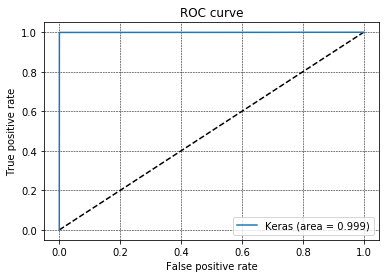

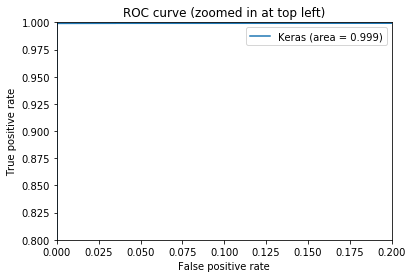

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid(which='major', linestyle='--', linewidth='0.5', color='black')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

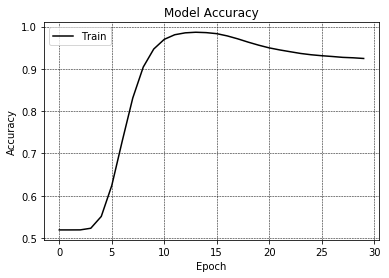

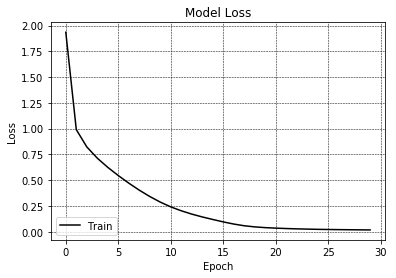

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'],color="black")
#plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left') #'Test'
plt.grid(which='major', linestyle='--', linewidth='0.5', color='black')
plt.savefig('Accuracy.png')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'],color="black")
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.grid(which='major', linestyle='--', linewidth='0.5', color='black')
plt.savefig('Loss.png')
plt.show()


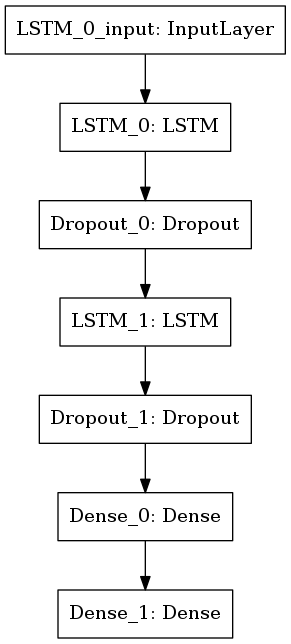

In [20]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(y_pred_keras[0:4])

#y_pred_keras_logits = [np.round(i) for i in y_pred_keras]

#print(y_pred_keras_logits[0:4])
print('Confusion Matrix')
print(confusion_matrix(Y_validation, y_pred_keras))
print('Classification Report')
target_names = ['Good', 'Bad']
print(classification_report(Y_validation, y_pred_keras, target_names=target_names))

[-0.15286294  0.9998977  -0.65410185  0.99964106]
Confusion Matrix


ValueError: Classification metrics can't handle a mix of binary and continuous targets